# Experiment 01 - Introduction to the Lab

Date:

Name:

Partner's name:

This first Jupyter notebook will be fairly guided, but you should add your own comments wherever you feel it is appropriate. In future labs you will be expected to take notes as you go about what you are doing and your observations.

# Measurements of Variable Resistor

Describe your measurements of the Variable Resistor with the DMM. If you took notes on paper, take a photo of your notes and include them here. Make sure you take a final recording after adjusting the screw as this will determine the ratio of the voltage divider we will use for the rest of the lab.

Enter your resistance measurements here to calculate the voltage divider ratio. Make sure that "$R_{out}$" is the resistance measured across the 2 legs you will measure a voltage across with the oscilloscope.

In [50]:
"""
Replace values below with your resistance measurements

"""

# import the  library numpy  and rename it  np
import numpy as np
import array

Rtot=10.44*1000 # Resistance between outer legs
dRtot=0.01*1000 # Uncertainty in the resistance between the outer legs
Rout=1.974*1000 # Resistance between middle and outer leg (use the pair you will measure with the oscilloscope)
dRout=0.001*1000 # Uncertainty in the resistance between the middle and outer leg

ratio=Rout/Rtot
dratio=ratio*np.sqrt((dRtot/Rtot)**2+(dRout/Rout)**2)
print("Ratio = ",ratio," +/- ",dratio)

Ratio =  0.18908045977011495  +/-  0.00020488105017691744


# Oscilloscope measurement and fitting tests

Following the instructions for this lab, take measurements of a sine wave output of the function generator and voltage divider output and use the generalized fitting routine we will use for this course to assess the quality of the output (i.e. how close is it to a clean sine wave), and determine where any issues lie so you will be familiar with a variety of potential pitfalls in future labs.

## Data set 1

Record your observations of the oscilloscope measurement of the signal according to the directions in the lab instructions and save the data (note the filename here or in a paper logbook).

### Upload and start working with data set 1

You can find the upload button on the upper right, above your list of directories. You should upload your data files into the same subdirectory as this notebook.

The first piece of Python code below is written to produce two plots of your data, one as voltage versus time, and one as voltage versus index number.

For the code to work, you will need to modify the filename used in the line `fname = 'vdivCH1.csv'`

You should also modify the title to make it more informative. We'll try to keep all of these blocks to be modified near the top.

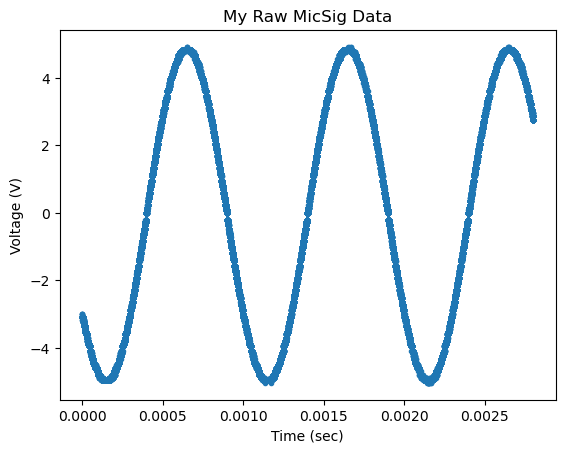

Text(0, 0.5, 'Voltage (V)')

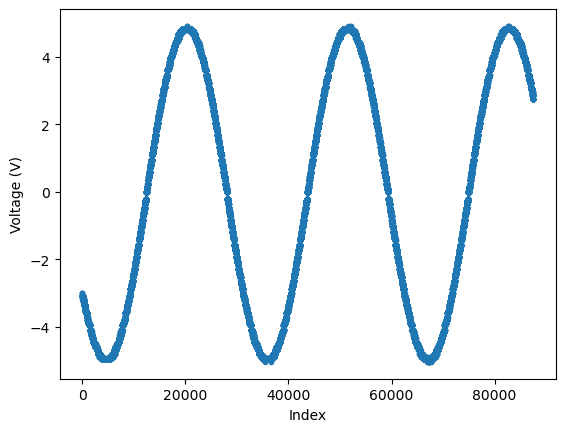

In [102]:
# import the  library numpy  and rename it  np
import numpy as np
import array

# import the library matplotlib and rename it plt
import matplotlib.pyplot as plt
#name  the input file  with the data
fname = 'vdivCH1.csv'
title = 'My Raw MicSig Data'

# read in data - the file is assumed to be in csv format (comma separated variables). 
#Files need to be specified with a full path OR they have to be saved in the same folder 
#as the script
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(3,4),skiprows=1)
# access the data columns and assign variables xraw and yraw
#generate  an array  xraw  which is the first  column  of  data.  Note the first column is 
#indexed as  zero.
xraw = data[:,0]
#generate  an array  yraw  which is the second  column  of  data  (index  1)
yraw = data[:,1]

indexraw=np.arange(len(xraw))


# plot the data
plt.scatter(xraw, yraw,marker='.')
# add axis labels
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.title(title)
plt.show()

# plot the data versus index
plt.scatter(indexraw,yraw,marker='.')
## marker='o' : use markers to indicate each data point (x_1,y_1),(x_2,y_2)
## linestyle= '' : no line is drawn to connect the data points
## linestyle= '-' : a line is drawn to connect the data points

# add axis labels
plt.xlabel('Index')
plt.ylabel('Voltage (V)')

You will notice in the second plot that the index value goes very high; there are 87500 data points (index 0 to 87499).
This is a big number that we will take advantage of in two ways. First, you can zoom in on the data to closely examine the noise. Second, we will average neighbouring points together, which will make the number of points plotted a bit more manageable, and gain some statistical advantage by averaging.

Let's start by examining the noise. First, make some notes in a cell below this one, about what you observe in the plot. Then, use the Python code below to zoom in on a minimum or maximum of the sine wave, restricting your plot to a narrow time range where the voltage does not vary much. You will need to adjust the x (`indexraw_min` and `indexraw_max`) and y limits to zoom in on the selection (`yregion_min` and `yregion_max`) until you see a slice of data that is flat and just shows the noise.

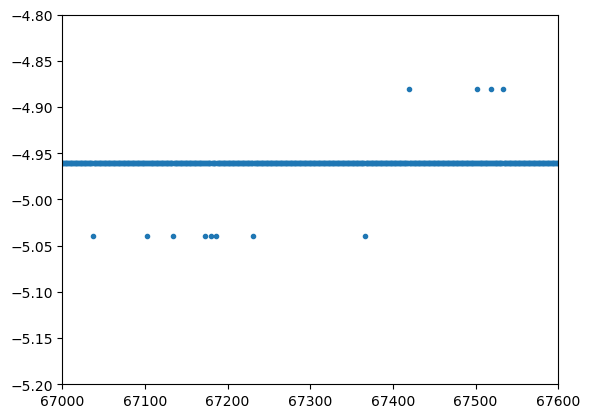

In [104]:
# the MicSig files contain 87,500 data points (index runs from 0 to 87499)
# here you can zoom in on some data to determine the noise
# pick a part of the curve that is flat

# choose the data range you want to examine
indexraw_min = 67000
indexraw_max = 67600

yregion_min=-5.2
yregion_max=-4.8

# change axis limits corresponding to where the data is in the above range
plt.xlim(indexraw_min,indexraw_max)
plt.ylim(yregion_min,yregion_max)

# plot the data versus index
plt.scatter(indexraw,yraw,marker='.')

# This next command displays the index plot. 
plt.show()

Once you have chosen a data range that is flat and shows just the noise, we can examine the noise statistically. The code below calculates the mean and standard deviation of this segment of data. It also produces a histogram of the data, so you can see what the distribution looks like. Note that this piece of code remembers your choice for the data range (`indexraw_min` and `indexraw_max`)

You might want to adjust the number of bins and histogram plotting limit to examine the distribution carefully.

Enter some notes in a cell below about what you observe in the distribution, and the values of mean and standard deviation. Note that the standard deviation provides a rough estimate of the uncertainty in each individual data point.

mean =  -4.960533333333333 0.01130113072022246
standard deviation =  0.01130113072022246


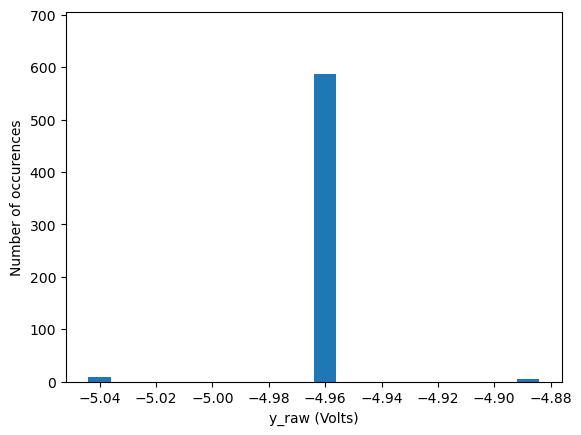

In [106]:
#calculate and display the mean and standard deviation of the data that you have zoomed in on.
y_ave = np.mean(yraw[indexraw_min:indexraw_max])
y_std = np.std(yraw[indexraw_min:indexraw_max])
print('mean = ',y_ave,y_std)
print('standard deviation = ', y_std)


hist,bins = np.histogram(yraw[indexraw_min:indexraw_max],bins=20)
plt.bar(bins[:-1],hist,width=bins[1]-bins[0])
plt.ylim(0,1.2*np.max(hist))
plt.xlabel('y_raw (Volts)')
plt.ylabel('Number of occurences')
plt.show()

Once you have examined the noise and determined a reasonable estimate for the standard deviation, we can do some averaging to reduce the uncertainty of individual data points.

For example, if you average 100 neighbouring data points, the uncertainty in that average is $\sqrt{100}$ smaller that the standard deviation of the individual data point.
So, you reduce uncertainty by a factor of 10. The cost for this is that you lose time resolution, but you have much more data and more time resolution that you need, so that is fine. 

Note that the code below makes use of the standard deviation that you found in the last piece of code.

We refer to this averaging process as "packing" the data, since it also serves to reduce the number of data points to something more manageable.

The code below does this packing. Try playing around with `npac`, the number of data points being averaged together. Compare what you see after packing to the plot of raw data. Don't forget to keep taking notes on what you observe.

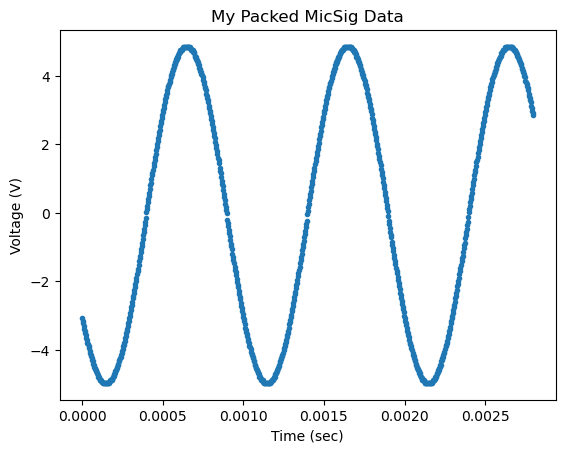

Packed Data Stored in  vdivCH1-packed.csv


In [52]:
"""
This block packs your data and saves it. 
"""

npac=100 # define packing factor  npac
title='My Packed MicSig Data' # give your graph a title
output_name = 'vdivCH1-packed.csv' # provide an output filename for the packed data

#define a function  to pack the data
def pack(A,p):
  # A is an array, and p is the packing factor
  B = np.zeros(len(A)//p)
  i = 1
  while i-1<len(B):
    B[i-1] = np.mean(A[p*(i-1):p*i])
    i += 1
  return B
# pack the data
x=pack(xraw,npac)
y=pack(yraw,npac)

#create a vector that also has the integer index (index = 0,1,2 ... length-1)
length=len(x)
#print(length)
index = np.arange(length)

#create a vector that contains fixed uncertainty for x values (in this case set to zero
sigmax = [0]*length
#print(sigmax)

#Create a vector that contains uncertainty of averaged y values. 
#sigmayraw is your estimate of the uncertainty in individual raw data points

#Here it is taking that value from your previous statistics code, but you can also enter a value by hand
#sigmaymean is the uncertainty of y after averaging npac points together
#sigmay is an array of uncertainties, all of the same value as sigmaymean
sigmayraw = y_std
sigmaymean = sigmayraw/np.sqrt(npac)
sigmay = [sigmaymean]*length

# plot the data
plt.errorbar(x, y,yerr=sigmay,marker='.',linestyle='')
# add axis labels
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.title(title)
plt.show()

# Import pandas for using Dataframes

import pandas as pd

# Create Array and output as CSV file with Headers

header = [np.array(['Time','u[time]','Voltage','u[Voltage]']), 
np.array(['(sec)','(sec)','(V)','(V)'])]
d1 = [x , sigmax , y , sigmay]
d1_a = np.array(d1)
df = pd.DataFrame(np.transpose(d1_a), columns=header )   
    
# print(df)

csv_data = df.to_csv(output_name, index = False)
print('Packed Data Stored in ', output_name)

### Introduction to fitting: load the data and make a guess

Now we will fit a model to the data, we will walk through the steps for this first data set, then move on to a more compact and generalized version you will use throughout the course.

The data set needs to be in a four-column .csv file, like the one you produced when you examined your data and packed it:
* `fname` is assumed to be in a four-column .csv file.
* In the following code, `skiprows=2` indicates that the first two rows in `fname` are headers (names and units)

<center>data = np.loadtxt(fname, .. , skiprows=2)</center>

* The four columns are x-values, x-uncertainties, y-values, y-uncertainties.
* The .csv file must be in the same folder as notebook. otherwise the full file extension must be added
to fname: e.g. fname = 'folder/subfolder/subsubfolder/file.csv'

You will typically need to update or modify the information contained in "LIST OF ALL INPUTS":
* `fname` to load the correct data file (for this example, it will be the packed data from the previous code cell)
* `x_name`, `x_units`, `y_name` and `y_units` to match your data file
* `fit_function = ..` to use your defined fitting function (for this example start with `sine_func`)
* `param_names` and `guesses` (your guesses can be guided by what you expect the parameters to be; hint: check your notes for what you set on the function generator!)
* Update any of the optional features flags as desired
For future experiments you will have additional options for fitting functions. If you want to modify the model (for example here, there is a sine wave with an offset added) you can define new fitting functions.

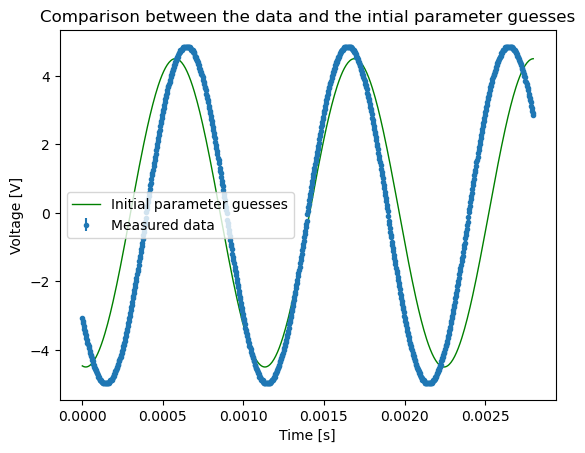

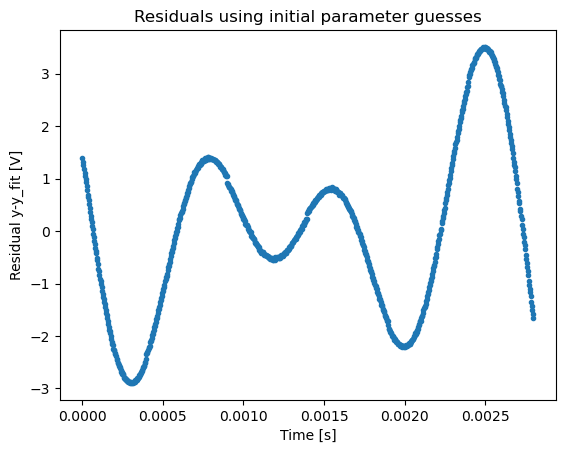

In [76]:
# Load python packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

###############################################################################
# DEFINED FITTING FUNCTIONS
###############################################################################

def sine_func(x, amplitude, freq, phase):
    return amplitude * np.sin(2.0 * np.pi * freq * x + phase)

def offset_sine_func(x, amplitude, freq, phase, offset):
    return (amplitude * np.sin(2.0 * np.pi * freq * x + phase)) + offset

###############################################################################
# LIST OF ALL INPUTS
###############################################################################

# Name of the data file
fname = "vdivCH1-packed.csv"

# Names and units of data columns from fname
x_name = "Time"
x_units = "s"
y_name = "Voltage"
y_units = "V"

# Modify to change the fitting function, parameter names and to set initial parameter guesses
fit_function = sine_func
param_names = ("amplitude", "frequency", "phase")
guesses = (4.5, 900, -1.7)

# Flags for optional features
show_covariance_matrix = False
set_xy_boundaries = False
lower_x = -0.01 # these values ignored if set_xy_boundaries = False
upper_x = 0.01
lower_y = -1
upper_y = 1

###############################################################################
# LOAD DATA
###############################################################################

# load the file fname and skip the first 'skiprows' rows
data = np.loadtxt(fname, delimiter=",", comments="#", usecols=(0, 1, 2, 3), skiprows=2)

# Assign the data file columns to variables for later use
x = data[:, 0]
y = data[:, 2]
y_sigma = data[:, 3]

###############################################################################
# INITIAL PLOT OF THE DATA
###############################################################################

# Define 500 points spanning the range of the x-data; for plotting smooth curves
xtheory = np.linspace(min(x), max(x), 500)

# Compare the guessed curve to the data for visual reference
y_guess = fit_function(xtheory, *guesses)
plt.errorbar(x, y, yerr=y_sigma, marker=".", linestyle="", label="Measured data")
plt.plot(
    xtheory,
    y_guess,
    marker="",
    linestyle="-",
    linewidth=1,
    color="g",
    label="Initial parameter guesses",
)
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"{y_name} [{y_units}]")
plt.title(r"Comparison between the data and the intial parameter guesses")
plt.legend(loc="best", numpoints=1)
plt.show()

# calculate the value of the model at each of the x-values of the data set
y_fit = fit_function(x, *guesses)

# Residuals are the difference between the data and theory
residual = y - y_fit

# Plot the residuals
plt.errorbar(x, residual, yerr=y_sigma, marker=".", linestyle="", label="residuals")
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"Residual y-y_fit [{y_units}]")
plt.title("Residuals using initial parameter guesses")
plt.show()

Take a look at the residuals.

The way least squares fitting works is to look at the difference between your data and the model. To do this, you calculate the value of the model at each of the "x values" in your data set. In this case, that means calculating the model sine function at every value of time in your data set.

The difference between each measured "y value" (Voltage in your data) and the model value is called the residuals. The code below calculates the residuals and plots them.

The smaller the residuals, the better the fit between data and model.

Note that since your data is sinusoidal, and your model is sinusoidal, the residuals might also look sinusoidal. The goal of fitting is to find parameters that make the residuals as small as possible and with no obvious shape. You can tinker with the parameters a bit to see how this influences the residuals.

### Perform the fit

The next section then performs a non-linear least squares fit of the defined function to the data using a routine called `curvefit` from the SciPy library. The routine is fairly robust, but the better the initial guess, and the better quality the data the less likely it will fail. In future, these two code blocks will be presented together.

This code block outputs the following:
* The reduced $\chi^2$ value ("reduced" meaning the $chi^2$ per degrees of freedom of the fit)
* Each parameter and its uncertainty from the fit
* Plots of the data with the fit, the residuals, and a histogram of the residuals (ideally the residuals will be centred around zero, small relative to the uncertainty, and structureless)

Chi-squared =  2945.8007211401177

Fit parameters:
   amplitude = 4.929e+00 ± 5.266e-05
   frequency = 1.000e+03 ± 2.350e-03
   phase = -2.500e+00 ± 2.355e-05




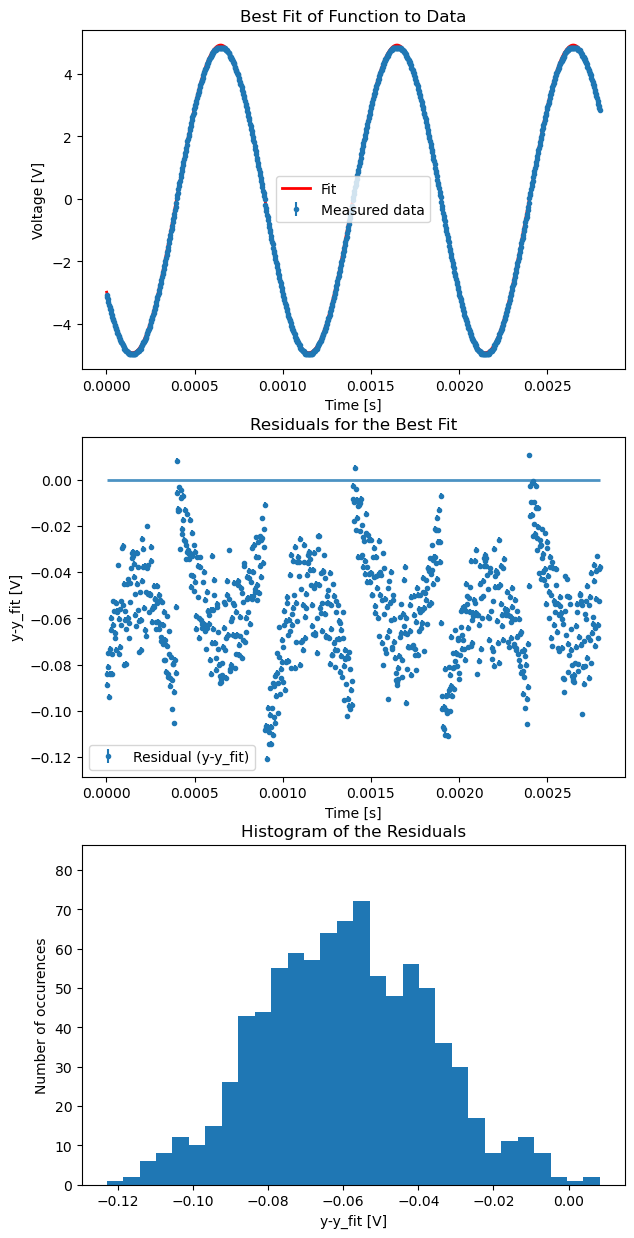

In [81]:
###############################################################################
# PERFORM THE FIT AND PRINT RESULTS
###############################################################################

# Use curve_fit to perform the fit
# fit_function: defined above to choose a specific fitting function 
# fit_params: holds the resulting fit parameters
# fit_cov: the covariance matrix between all the parameters
#          (used to extract fitting parameter uncertanties)
# maxfev=10**5: maximum number of fitting procedure iterations before giving up
# absolute_sigma=True: uncertainties are treated as absolute (not relative)
fit_params, fit_cov = curve_fit(
    fit_function, x, y, sigma=y_sigma, 
    p0=guesses,absolute_sigma=True, maxfev=10**5)

# Define the function that calculates chi-squared
def chi_square(fit_parameters, x, y, sigma):
    dof = len(x) - len(fit_params)
    return np.sum((y - fit_function(x, *fit_parameters)) ** 2 / sigma**2)/dof

# Calculate and print reduced chi-squared
chi2 = chi_square(fit_params, x, y, y_sigma)
print("Chi-squared = ", chi2)

# Calculate the uncertainties in the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# Print the fit parameters with uncertianties
print("\nFit parameters:")
for i in range(len(fit_params)):
    print(f"   {param_names[i]} = {fit_params[i]:.3e} ± {fit_params_error[i]:.3e}")
print("\n")

# (Optional) Print the covariance between all variables
if show_covariance_matrix:
    print("Covariance between fit parameters:")
    for i, fit_covariance in enumerate(fit_cov):
        for j in range(i+1,len(fit_covariance)):
            print(f"   {param_names[i]} and {param_names[j]}: {fit_cov[i,j]:.3e}")
    print("\n")

# residual is the difference between the data and model
x_fitfunc = np.linspace(min(x), max(x), len(x))
y_fitfunc = fit_function(x_fitfunc, *fit_params)
y_fit = fit_function(x, *fit_params)
residual = y-y_fit

###############################################################################
# PRODUCE A MULTIPANEL PLOT, WITH SCATTER PLOT, RESIDUALS AND RESIDUALS HISTOGRAM
###############################################################################

# The size of the canvas
fig = plt.figure(figsize=(7,15))

# The scatter plot
ax1 = fig.add_subplot(311)
ax1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="Measured data")
ax1.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2,color="r", label="Fit")
ax1.set_xlabel(f"{x_name} [{x_units}]")
ax1.set_ylabel(f"{y_name} [{y_units}]")
ax1.set_title('Best Fit of Function to Data')

# (Optional) set the x and y boundaries of your plot
if set_xy_boundaries:
    plt.xlim(lower_x,upper_x)
    plt.ylim(lower_y,upper_y)
# Show the legend. loc='best' places it where the date are least obstructed
ax1.legend(loc='best',numpoints=1)

# The residuals plot
ax2 = fig.add_subplot(312)
ax2.errorbar(x, residual, yerr=y_sigma,marker='.', linestyle='', label="Residual (y-y_fit)")
ax2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
ax2.set_xlabel(f"{x_name} [{x_units}]")
ax2.set_ylabel(f"y-y_fit [{y_units}]")
ax2.set_title('Residuals for the Best Fit')
ax2.legend(loc='best',numpoints=1)

# Histogram of the residuals
ax3 = fig.add_subplot(313)
hist,bins = np.histogram(residual,bins=30)
ax3.bar(bins[:-1],hist,width=bins[1]-bins[0])
ax3.set_ylim(0,1.2*np.max(hist))
ax3.set_xlabel(f"y-y_fit [{y_units}]")
ax3.set_ylabel('Number of occurences')
ax3.set_title('Histogram of the Residuals')

# Save a copy of the figure as a png 
plt.savefig('FittingResults.png')

# Show the plot
plt.show()

Comment on the residuals and quality of the fit. What does this say about the data you aquired? About the model you are using to describe the data?

## Data set 2

Record your observations of the oscilloscope measurement of the signal according to the directions in the lab instructions and save the data (note the filename here or in a paper logbook).

In [ ]:
# import the  library numpy  and rename it  np
import numpy as np
import array

# import the library matplotlib and rename it plt
import matplotlib.pyplot as plt
#name  the input file  with the data
fname = 'vdivCH1.csv'
title = 'My Raw MicSig Data'

# the MicSig files contain 87,500 data points (index runs from 0 to 87499)
# here you can zoom in on some data to determine the noise
# pick a part of the curve that is flat

# choose the data range you want to examine and set the y-range
indexraw_min = 67000
indexraw_max = 67600

yregion_min=-5.2
yregion_max=-4.8

# read in data - the file is assumed to be in csv format (comma separated variables). 
#Files need to be specified with a full path OR they have to be saved in the same folder 
#as the script
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(3,4),skiprows=1)
# access the data columns and assign variables xraw and yraw
#generate  an array  xraw  which is the first  column  of  data.  Note the first column is 
#indexed as  zero.
xraw = data[:,0]
#generate  an array  yraw  which is the second  column  of  data  (index  1)
yraw = data[:,1]

indexraw=np.arange(len(xraw))


# plot the data
plt.scatter(xraw, yraw,marker='.')
# add axis labels
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.title(title)
plt.show()

# plot the data versus index
plt.scatter(indexraw,yraw,marker='.')
## marker='o' : use markers to indicate each data point (x_1,y_1),(x_2,y_2)
## linestyle= '' : no line is drawn to connect the data points
## linestyle= '-' : a line is drawn to connect the data points

# add axis labels
plt.xlabel('Index')
plt.ylabel('Voltage (V)')

# change axis limits corresponding to where the data is in the above range
plt.xlim(indexraw_min,indexraw_max)
plt.ylim(yregion_min,yregion_max)

# plot the data versus index
plt.scatter(indexraw,yraw,marker='.')

# This next command displays the index plot. 
plt.show()

#calculate and display the mean and standard deviation of the data that you have zoomed in on.
y_ave = np.mean(yraw[indexraw_min:indexraw_max])
y_std = np.std(yraw[indexraw_min:indexraw_max])
print('mean = ',y_ave,y_std)
print('standard deviation = ', y_std)


hist,bins = np.histogram(yraw[indexraw_min:indexraw_max],bins=20)
plt.bar(bins[:-1],hist,width=bins[1]-bins[0])
plt.ylim(0,1.2*np.max(hist))
plt.xlabel('y_raw (Volts)')
plt.ylabel('Number of occurences')
plt.show()

Once you've examined the data and determined uncertainties, you can now "pack" the data. Set the packing factor `npac` and don't forget to change the filename `output_name` to save the packed data.

In [ ]:
"""
This block packs your data and saves it. 
"""

npac=100 # define packing factor  npac
title='My Packed MicSig Data' # give your graph a title
output_name = 'vdivCH1-packed.csv' # provide an output filename for the packed data

#define a function  to pack the data
def pack(A,p):
  # A is an array, and p is the packing factor
  B = np.zeros(len(A)//p)
  i = 1
  while i-1<len(B):
    B[i-1] = np.mean(A[p*(i-1):p*i])
    i += 1
  return B
# pack the data
x=pack(xraw,npac)
y=pack(yraw,npac)

#create a vector that also has the integer index (index = 0,1,2 ... length-1)
length=len(x)
#print(length)
index = np.arange(length)

#create a vector that contains fixed uncertainty for x values (in this case set to zero
sigmax = [0]*length
#print(sigmax)

#Create a vector that contains uncertainty of averaged y values. 
#sigmayraw is your estimate of the uncertainty in individual raw data points

#Here it is taking that value from your previous statistics code, but you can also enter a value by hand
#sigmaymean is the uncertainty of y after averaging npac points together
#sigmay is an array of uncertainties, all of the same value as sigmaymean
sigmayraw = y_std
sigmaymean = sigmayraw/np.sqrt(npac)
sigmay = [sigmaymean]*length

# plot the data
plt.errorbar(x, y,yerr=sigmay,marker='.',linestyle='')
# add axis labels
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.title(title)
plt.show()

# Import pandas for using Dataframes

import pandas as pd

# Create Array and output as CSV file with Headers

header = [np.array(['Time','u[time]','Voltage','u[Voltage]']), 
np.array(['(sec)','(sec)','(V)','(V)'])]
d1 = [x , sigmax , y , sigmay]
d1_a = np.array(d1)
df = pd.DataFrame(np.transpose(d1_a), columns=header )   
    
# print(df)

csv_data = df.to_csv(output_name, index = False)
print('Packed Data Stored in ', output_name)

Use the full generalized fitting routine to fit a function (sine) to the data and plot the result and the residuals. Make sure to update the following variables:
* `fname` to load the correct data file
* `x_name`, `x_units`, `y_name` and `y_units` to match your data file
* `fit_function = ..` to use your defined fitting function
* `param_names` and `guesses`
* Update any of the optional features flags as desired

In [ ]:
# Load python packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

###############################################################################
# DEFINED FITTING FUNCTIONS
###############################################################################

def sine_func(x, amplitude, freq, phase):
    return amplitude * np.sin(2.0 * np.pi * freq * x + phase)

def offset_sine_func(x, amplitude, freq, phase, offset):
    return (amplitude * np.sin(2.0 * np.pi * freq * x + phase)) + offset

###############################################################################
# LIST OF ALL INPUTS
###############################################################################

# Name of the data file
fname = "sintest2_pack.csv"

# Names and units of data columns from fname
x_name = "Time"
x_units = "s"
y_name = "Voltage"
y_units = "V"

# Modify to change the fitting function, parameter names and to set initial parameter guesses
fit_function = sine_func
param_names = ("amplitude", "frequency", "phase")
guesses = (1.0, 900, 0.1)

# Flags for optional features
show_covariance_matrix = False
set_xy_boundaries = False
lower_x = -0.01 # these values ignored if set_xy_boundaries = False
upper_x = 0.01
lower_y = -1
upper_y = 1

###############################################################################
# LOAD DATA
###############################################################################

# load the file fname and skip the first 'skiprows' rows
data = np.loadtxt(fname, delimiter=",", comments="#", usecols=(0, 1, 2, 3), skiprows=2)

# Assign the data file columns to variables for later use
x = data[:, 0]
y = data[:, 2]
y_sigma = data[:, 3]

###############################################################################
# INITIAL PLOT OF THE DATA
###############################################################################

# Define 500 points spanning the range of the x-data; for plotting smooth curves
xtheory = np.linspace(min(x), max(x), 500)

# Compare the guessed curve to the data for visual reference
y_guess = fit_function(xtheory, *guesses)
plt.errorbar(x, y, yerr=y_sigma, marker=".", linestyle="", label="Measured data")
plt.plot(
    xtheory,
    y_guess,
    marker="",
    linestyle="-",
    linewidth=1,
    color="g",
    label="Initial parameter guesses",
)
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"{y_name} [{y_units}]")
plt.title(r"Comparison between the data and the intial parameter guesses")
plt.legend(loc="best", numpoints=1)
plt.show()

# calculate the value of the model at each of the x-values of the data set
y_fit = fit_function(x, *guesses)

# Residuals are the difference between the data and theory
residual = y - y_fit

# Plot the residuals
plt.errorbar(x, residual, yerr=y_sigma, marker=".", linestyle="", label="residuals")
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"Residual y-y_fit [{y_units}]")
plt.title("Residuals using initial parameter guesses")
plt.show()

###############################################################################
# PERFORM THE FIT AND PRINT RESULTS
###############################################################################

# Use curve_fit to perform the fit
# fit_function: defined above to choose a specific fitting function 
# fit_params: holds the resulting fit parameters
# fit_cov: the covariance matrix between all the parameters
#          (used to extract fitting parameter uncertanties)
# maxfev=10**5: maximum number of fitting procedure iterations before giving up
# absolute_sigma=True: uncertainties are treated as absolute (not relative)
fit_params, fit_cov = curve_fit(
    fit_function, x, y, sigma=y_sigma, 
    p0=guesses,absolute_sigma=True, maxfev=10**5)

# Define the function that calculates chi-squared
def chi_square(fit_parameters, x, y, sigma):
    dof = len(x) - len(fit_params)
    return np.sum((y - fit_function(x, *fit_parameters)) ** 2 / sigma**2)/dof

# Calculate and print reduced chi-squared
chi2 = chi_square(fit_params, x, y, y_sigma)
print("Chi-squared = ", chi2)

# Calculate the uncertainties in the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# Print the fit parameters with uncertianties
print("\nFit parameters:")
for i in range(len(fit_params)):
    print(f"   {param_names[i]} = {fit_params[i]:.3e} ± {fit_params_error[i]:.3e}")
print("\n")

# (Optional) Print the covariance between all variables
if show_covariance_matrix:
    print("Covariance between fit parameters:")
    for i, fit_covariance in enumerate(fit_cov):
        for j in range(i+1,len(fit_covariance)):
            print(f"   {param_names[i]} and {param_names[j]}: {fit_cov[i,j]:.3e}")
    print("\n")

# residual is the difference between the data and model
x_fitfunc = np.linspace(min(x), max(x), len(x))
y_fitfunc = fit_function(x_fitfunc, *fit_params)
y_fit = fit_function(x, *fit_params)
residual = y-y_fit

###############################################################################
# PRODUCE A MULTIPANEL PLOT, WITH SCATTER PLOT, RESIDUALS AND RESIDUALS HISTOGRAM
###############################################################################

# The size of the canvas
fig = plt.figure(figsize=(7,15))

# The scatter plot
ax1 = fig.add_subplot(311)
ax1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="Measured data")
ax1.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2,color="r", label="Fit")
ax1.set_xlabel(f"{x_name} [{x_units}]")
ax1.set_ylabel(f"{y_name} [{y_units}]")
ax1.set_title('Best Fit of Function to Data')

# (Optional) set the x and y boundaries of your plot
if set_xy_boundaries:
    plt.xlim(lower_x,upper_x)
    plt.ylim(lower_y,upper_y)
# Show the legend. loc='best' places it where the date are least obstructed
ax1.legend(loc='best',numpoints=1)

# The residuals plot
ax2 = fig.add_subplot(312)
ax2.errorbar(x, residual, yerr=y_sigma,marker='.', linestyle='', label="Residual (y-y_fit)")
ax2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
ax2.set_xlabel(f"{x_name} [{x_units}]")
ax2.set_ylabel(f"y-y_fit [{y_units}]")
ax2.set_title('Residuals for the Best Fit')
ax2.legend(loc='best',numpoints=1)

# Histogram of the residuals
ax3 = fig.add_subplot(313)
hist,bins = np.histogram(residual,bins=30)
ax3.bar(bins[:-1],hist,width=bins[1]-bins[0])
ax3.set_ylim(0,1.2*np.max(hist))
ax3.set_xlabel(f"y-y_fit [{y_units}]")
ax3.set_ylabel('Number of occurences')
ax3.set_title('Histogram of the Residuals')

# Save a copy of the figure as a png 
plt.savefig('FittingResults.png')

# Show the plot
plt.show()

Comment on the residuals and quality of the fit. What does this say about the data you aquired? About the model you are using to describe the data?

## Data Set 3

Now that we've gone through the process a couple of times, try copying the merged cells from Data set 2 above to analyze your additional data sets. You need to:
* Acquire and save the data, and record any observations you have
* Load and examine the data
* Pack the data
* Fit the expected function to the data
* Assess the results

## Data Set 4: the best one!

Hopefully having encountered a few (intentional) issues, you have been able to acquire one really clean data set. Analyze this final, best example here, and comment on whether it follows your expectations, and if not what you might still need to do to optimize either your data collection or the model, or both.

# Conclusion

Now that you've taken data under different conditions, fit a model to the data, and compared both the direct outputs and the quality of the fits to a reasonably expected model, write a few notes to yourself for things to look for and consider when setting up your circuit, signals and data acquisition with the oscilloscope.